In [4]:
#import necessary libraries
import pandas as pd
import numpy as np

import preprocess_fncs as prep

import matplotlib.pyplot as plt
%matplotlib inline

#display options
from IPython.display import display
pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.8)

import warnings
#warnings.SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [5]:
#read the collected data
df_init = pd.read_csv('final_movie_data.csv',index_col=0)

#preprocess data
df = prep.preprocess(df_init)

,year,budget_M,revenue_M,return_M,gain/loss_%,runtime
count,5390.00,5390.00,5390.00,5390.00,5390.00,5390.00
mean,1957.98,26.34,72.50,46.16,1038138.75,108.59
std,292.13,62.94,155.62,138.33,57601744.31,37.54
min,0.00,0.00,-0.00,-3499.05,-300.00,1.00
25%,1995.00,2.00,1.89,-0.38,-117.98,94.00
50%,2006.00,10.50,16.16,3.66,-4.92,105.00
75%,2012.00,30.00,71.28,40.59,203.82,121.00
max,2020.00,3500.05,2787.97,2550.97,4166449800.00,2000.00


,title,first_genres,first_production_countries,first_production_companies
count,5390,5390,5390,5390
unique,5312,20,82,2322
top,The Three Musketeers,Drama,United States of America,missing
freq,3,1305,2975,450


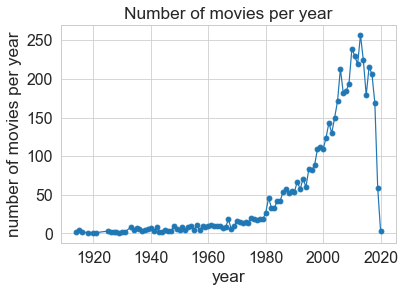

In [21]:
#show summary of the data
#numeric data
display(df.describe())

#categorical data
first_cols = [col for col in list(df.columns) 
             if col.startswith('first')]
display(df.describe(include=['object'])[['title']+first_cols])

#plot number of movies per a year
ax1 = df[df.year > 0].year.value_counts().sort_index()\
                    .plot(kind='line',marker='o',figsize=(6,4),
                          title = 'Number of movies per year')

#change axis labels
ax1.set_xlabel('year')
_ = ax1.set_ylabel('number of movies per year')

In [ ]:
#  hueorder = list(select_genre)
#     hueorder.append('other')

50.7% of movies have losses.


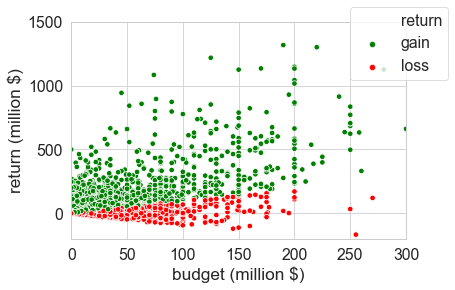

In [22]:
#How budget influence on total revenue in millions?
fig, ax1 = plt.subplots(1,1,figsize=(6,4))

#plot return vs budget in millions $
sns.scatterplot(x='budget_M', y='return_M', hue='return_type',
                data=df, s=30, ax=ax1,palette=['green','red'])

#change axis labels
ax1.set_xlabel('budget (million $)')
ax1.set_ylabel('return (million $)')

#legend parameters
ax1.legend(loc='right',bbox_to_anchor = [1.15, 0.9])\
   .texts[0].set_text("return")

#change axis limits
ax1.set_xlim(0,300)
ax1.set_ylim(-200,1500)

#What is the percentage of movies with negative return?
neg_return = round(df[df['gain/loss_%'] < 0].shape[0] 
                   / df.shape[0] * 100,1)
print(f'{neg_return}% of movies have losses.')

,title,return_type,first_genres,first_production_countries,first_production_companies
count,5247,5247,5247,5247,5247
unique,5177,2,20,82,2255
top,The Three Musketeers,loss,Drama,United States of America,missing
freq,3,2785,1266,2891,431


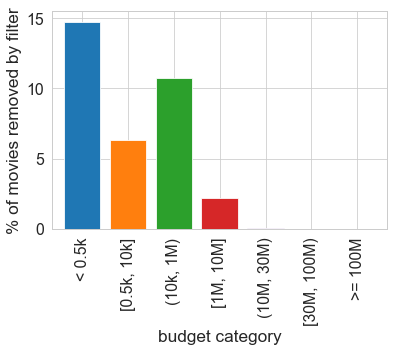

In [26]:
#filter the outliers in terms of return
filter_cond = ((df['gain/loss_%'] < 1000) & (df['budget_M'] < 0.0005)) \
                | ((df['gain/loss_%'] < 3000) & (df['budget_M'] >= 0.0005))

#filter other company for plotting
#filter_other_company = (df.select_company != 'other') 

#What is the percentage of data filtered from data 
fig, ax1 = plt.subplots(1,1,figsize=(6,4))

filter_count = df[~filter_cond].groupby('budget_category')['budget_category'].count()
keep_count = df[filter_cond].groupby('budget_category')['budget_category'].count()

(filter_count/keep_count*100).plot(kind='bar',width=0.8)

ax1.set_xlabel('budget category')
ax1.set_ylabel('% of movies removed by filter')

df[filter_cond].describe(include=['object']).iloc[:,:5]

,title,return_type,first_genres,first_production_countries,first_production_companies
count,5247,5247,5247,5247,5247
unique,5177,2,20,82,2255
top,The Three Musketeers,loss,Drama,United States of America,missing
freq,3,2785,1266,2891,431


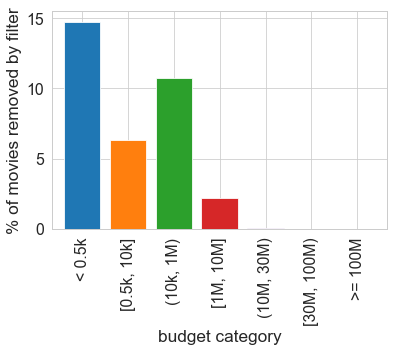

In [10]:
df.columns

Index(['title', 'year', 'budget_M', 'revenue_M', 'return_M', 'gain/loss_%',
       'return_type', 'runtime', 'first_genres', 'first_production_countries',
       'first_production_companies', 'select_genres',
       'select_production_countries', 'select_production_companies',
       'budget_category'],
      dtype='object')

In [13]:
[col for col in list(df.columns) if col.startswith('first')]

['first_genres', 'first_production_countries', 'first_production_companies']

In [17]:
['title'] + first_cols

['title',
 'first_genres',
 'first_production_countries',
 'first_production_companies']